**DATA COLLECTION AND PREPARATION**

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
import imblearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

In [2]:
data = pd.read_csv('loan_prediction.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [5]:
# Dropping Loan_ID column
data.drop(['Loan_ID'],axis=1,inplace=True)

In [6]:
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])

#replacing + with space for filling the nan values
data['Dependents']=data['Dependents'].str.replace('+','')
data['Dependents'] = data['Dependents'].fillna(data['Dependents'].mode()[0])
data['Self_Employed'] = data['Self_Employed'].fillna (data['Self_Employed'].mode()[0])
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mode()[0])
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0])
data['Credit_History'] = data['Credit_History'].fillna (data['Credit_History'].mode()[0])

/var/folders/wz/16zkmzc90kxby1t66xr58zhm0000gn/T/ipykernel_53199/871284480.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['Dependents']=data['Dependents'].str.replace('+','')


In [7]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,120.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [8]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how
# to understand word labels.
label_encoder = preprocessing.LabelEncoder()
obj = (data.dtypes == 'object')
for col in list(obj[obj].index):
  data[col] = label_encoder.fit_transform(data[col])


In [9]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,120.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [10]:
#changing the datype of each float column to int

data['Gender']=data['Gender'].astype('int64')
data['Married']=data['Married'].astype('int64')
data['Dependents']=data['Dependents'].astype('int64')
data['Self_Employed' ]=data['Self_Employed'].astype('int64')
data['CoapplicantIncome'] = data['CoapplicantIncome'].astype('int64')
data['LoanAmount']=data['LoanAmount'].astype('int64')
data['Loan_Amount_Term']=data['Loan_Amount_Term'].astype('int64')
data['Credit_History']=data['Credit_History'].astype('int64')

In [11]:
#Balancing the dataset by using smote
from imblearn.combine import SMOTETomek
smote = SMOTETomek()

In [12]:
#dividing the dataset into dependent and independent y and x respectively
y = data['Loan_Status']
x = data.drop(columns=['Loan_Status'], axis=1)

In [13]:
#creating a new x and y variables for the balnced set
x_bal,y_bal = smote.fit_resample(x,y)

In [14]:
#printing the values of y before balancing the data and after
print(y.value_counts())
print(y_bal.value_counts())

1    422
0    192
Name: Loan_Status, dtype: int64
1    353
0    353
Name: Loan_Status, dtype: int64


In [15]:
x_bal

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0,120,360,1,2
1,1,1,1,0,0,4583,1508,128,360,1,0
2,1,1,0,0,1,3000,0,66,360,1,2
3,1,1,0,1,0,2583,2358,120,360,1,2
4,1,0,0,0,0,6000,0,141,360,1,2
...,...,...,...,...,...,...,...,...,...,...,...
701,1,0,0,0,0,2414,0,102,433,1,0
702,0,0,0,0,0,3763,0,107,466,1,1
703,0,0,0,0,0,3429,0,91,360,0,0
704,1,0,0,0,0,5932,3179,253,360,1,0


**EXPLORATORY DATA ANALYSIS**

In [16]:
data.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.00000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.24430,145.465798,342.410423,0.855049,1.037459,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.24876,84.180967,64.428629,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.00000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.00000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.50000,125.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.25000,164.750000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.00000,700.000000,480.000000,1.000000,2.000000,1.000000


/var/folders/wz/16zkmzc90kxby1t66xr58zhm0000gn/T/ipykernel_53199/3941809966.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['ApplicantIncome'], color='r')
/var/folders/wz/16zkmzc90kxby1t66xr58zhm0000gn/T/ipykernel_53199/3941809966.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data

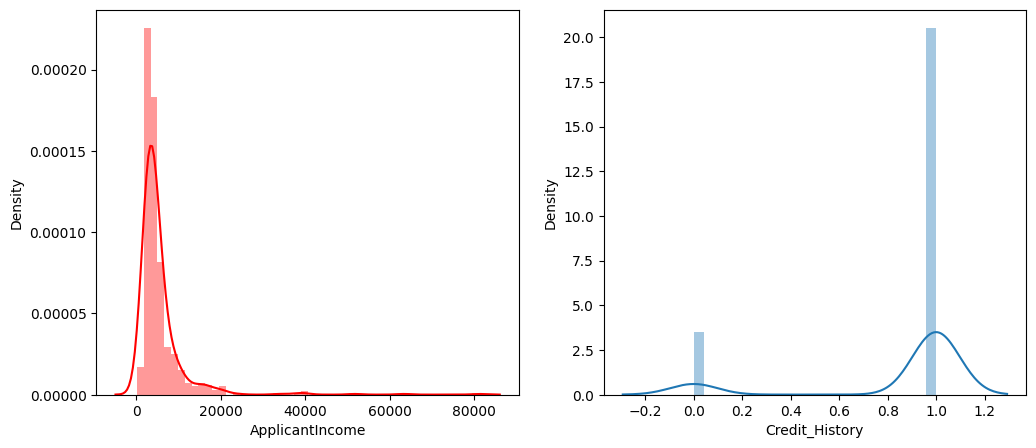

In [17]:
#plotting the using distplot
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(data['ApplicantIncome'], color='r')
plt.subplot(122)
sns.distplot(data['Credit_History'])
plt.show()

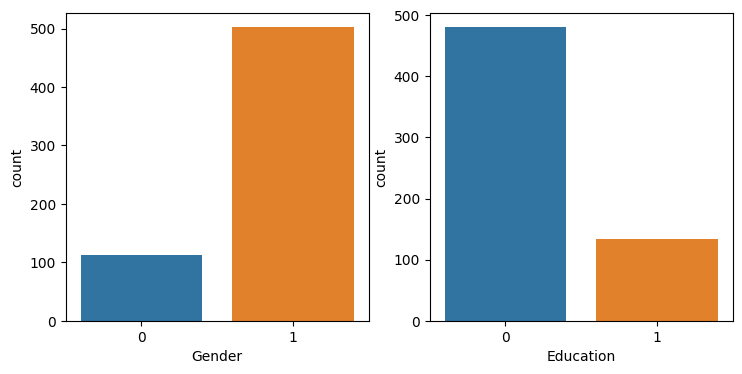

In [18]:
#platting the count plot
plt.figure(figsize=(18,4))
plt.subplot(1,4,1)
sns.countplot(x='Gender',data=data)
plt.subplot(1,4,2)
sns.countplot(x ='Education',data=data)
plt.show()

<AxesSubplot: xlabel='Property_Area', ylabel='count'>

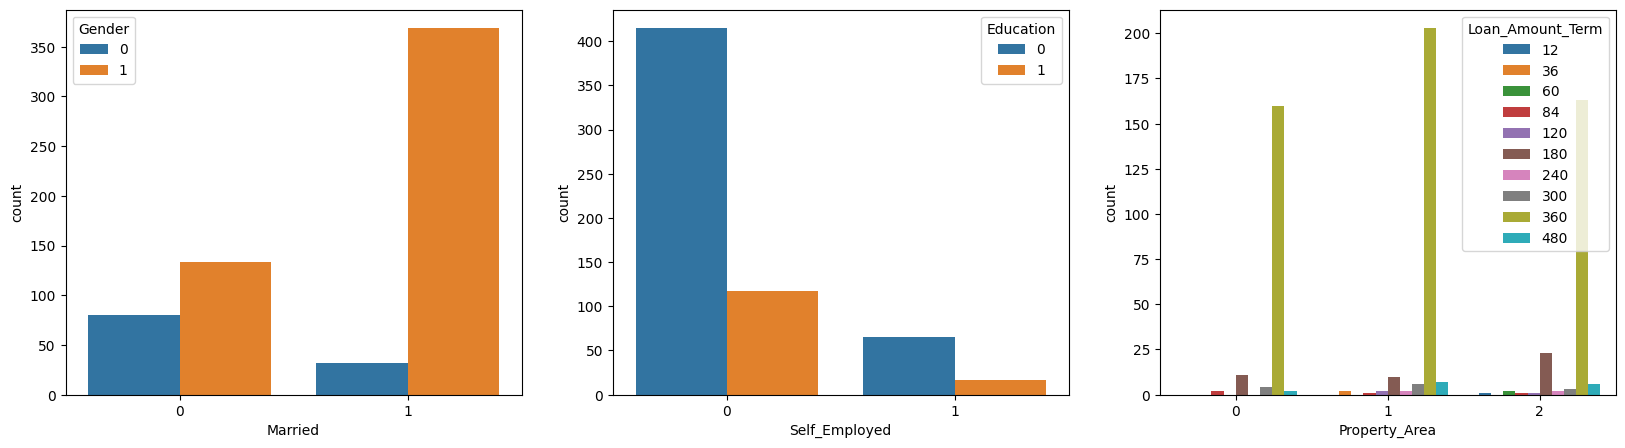

In [19]:
plt.figure(figsize=(20,5))
plt.subplot(131)
sns.countplot(x = 'Married', hue='Gender', data = data)
plt.subplot(132)
sns.countplot(x = 'Self_Employed', hue='Education', data = data)
plt.subplot(133)
sns.countplot(x = 'Property_Area', hue='Loan_Amount_Term', data = data)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3543: UserWarning: 45.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot: xlabel='Gender', ylabel='ApplicantIncome'>

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3543: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3543: UserWarning: 61.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3543: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/categorical.py:3543: UserWarning: 61.6% of the points cannot be placed; you may want to decrease the size of the markers or use s

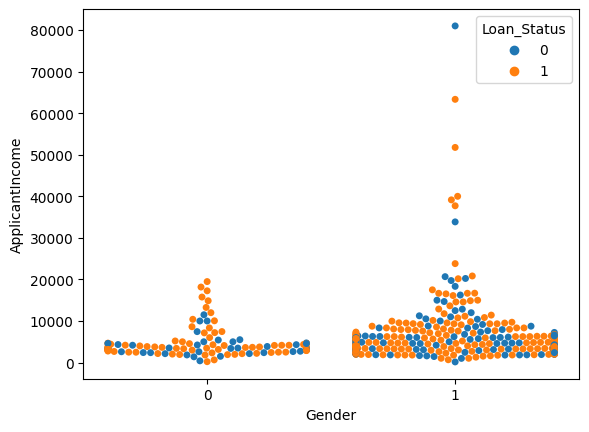

In [20]:
#visulaized based gender and income what would be the appplication status
sns.swarmplot(x='Gender', y='ApplicantIncome', hue = 'Loan_Status', data = data)

In [21]:
# perfroming feature Scaling operation using standard scaller on X part of the dataset becaus
#there different type of values in the columns
sc=StandardScaler()
x_bal=sc.fit_transform(x_bal)
x_bal = pd.DataFrame(x_bal)

In [22]:
#splitting the dataset in train and test on balanced dataset
X_train, X_test, y_train, y_test = train_test_split( x_bal, y_bal, test_size=0.33, random_state=42)

**MODEL BUILDING**

In [23]:
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
xg = GradientBoostingClassifier()

**Decision tree model**

In [24]:
def decisionTree():
   dt.fit(X_train,y_train)
   yPred = dt.predict(X_test)
   print('****DecisionTreeClassifier****')
   print('Confusion matrix')
   print(confusion_matrix(y_test,yPred))
   print('Classification report')
   print(classification_report(y_test, yPred))

**Random forest model**

In [25]:
def randomForest():
  rf.fit(X_train,y_train)
  yPred = rf.predict(X_test)
  print('***RandomForestClassifier***')
  print('Confusion matrix')
  print(confusion_matrix(y_test,yPred))
  print('Classification report')
  print(classification_report(y_test, yPred))

In [26]:
def KNN():
  knn.fit(X_train,y_train)
  yPred = knn.predict(X_test)
  print('***KNeighborsClassifier***')
  print('Confusion matrix')
  print(confusion_matrix(y_test,yPred))
  print('Classification report')
  print(classification_report(y_test,yPred))

**Xgboost model**

In [27]:
def xgboost():
  xg.fit(X_train,y_train)
  yPred = xg.predict(X_test)
  print('****Gradient BoostingClassifier***')
  print('Confusion matrix')
  print(confusion_matrix(y_test,yPred))
  print('Classification report')
  print(classification_report (y_test,yPred))

**ANN model**

In [28]:
# Importing the Keras libraries and packages
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# Initialising the ANN
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense (units=100, activation='relu', input_dim=11))
# Adding the second hidden layer
classifier.add(Dense (units=50, activation='relu'))
# Adding the output layer
classifier.add(Dense (units=1, activation='sigmoid'))
# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

**TRAINING**



In [29]:
decisionTree()
randomForest()
KNN()
xgboost()

****DecisionTreeClassifier****
Confusion matrix
[[87 26]
 [32 88]]
Classification report
              precision    recall  f1-score   support

           0       0.73      0.77      0.75       113
           1       0.77      0.73      0.75       120

    accuracy                           0.75       233
   macro avg       0.75      0.75      0.75       233
weighted avg       0.75      0.75      0.75       233

***RandomForestClassifier***
Confusion matrix
[[88 25]
 [21 99]]
Classification report
              precision    recall  f1-score   support

           0       0.81      0.78      0.79       113
           1       0.80      0.82      0.81       120

    accuracy                           0.80       233
   macro avg       0.80      0.80      0.80       233
weighted avg       0.80      0.80      0.80       233

***KNeighborsClassifier***
Confusion matrix
[[ 70  43]
 [ 20 100]]
Classification report
              precision    recall  f1-score   support

           0       0.78   

In [30]:
# Fitting the ANN to the training set
model_history = classifier.fit(X_train, y_train, batch_size=100, validation_split=0.2, epochs=100)

Epoch 1/100


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/data_adapter.py:1798: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


4/4 [==============================] - 0s 43ms/step - loss: 0.6869 - accuracy: 0.5741 - val_loss: 0.6724 - val_accuracy: 0.5579
Epoch 2/100
4/4 [==============================] - 0s 7ms/step - loss: 0.6307 - accuracy: 0.7090 - val_loss: 0.6362 - val_accuracy: 0.6526
Epoch 3/100
4/4 [==============================] - 0s 7ms/step - loss: 0.5835 - accuracy: 0.7407 - val_loss: 0.6067 - val_accuracy: 0.6632
Epoch 4/100
4/4 [==============================] - 0s 7ms/step - loss: 0.5466 - accuracy: 0.7513 - val_loss: 0.5837 - val_accuracy: 0.6737
Epoch 5/100
4/4 [==============================] - 0s 7ms/step - loss: 0.5134 - accuracy: 0.7804 - val_loss: 0.5664 - val_accuracy: 0.6842
Epoch 6/100
4/4 [==============================] - 0s 7ms/step - loss: 0.4855 - accuracy: 0.7857 - val_loss: 0.5534 - val_accuracy: 0.6842
Epoch 7/100
4/4 [==============================] - 0s 7ms/step - loss: 0.4620 - accuracy: 0.7937 - val_loss: 0.5435 - val_accuracy: 0.7053
Epoch 8/100
4/4 [=====================

In [31]:
classifier.save("loan.h5")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [32]:
y_pred = classifier.predict(X_test)

8/8 [==============================] - 0s 698us/step


In [33]:
y_pred

array([[9.7092259e-01],
       [9.1691959e-01],
       [4.1848210e-01],
       [9.8382932e-01],
       [5.2885902e-01],
       [8.8749415e-01],
       [9.4491309e-01],
       [1.6249482e-05],
       [3.4416545e-02],
       [8.9704370e-01],
       [9.1558945e-01],
       [9.6183521e-01],
       [9.3240964e-01],
       [5.2439815e-01],
       [7.7738547e-01],
       [8.1450450e-01],
       [7.5481260e-01],
       [1.5759331e-07],
       [9.6723855e-01],
       [9.9573249e-01],
       [9.5401967e-01],
       [6.4198986e-02],
       [5.4336823e-07],
       [7.2452992e-01],
       [2.4286062e-05],
       [5.9731185e-01],
       [9.8377496e-01],
       [7.1030176e-01],
       [6.4328635e-01],
       [6.2934661e-01],
       [5.9475720e-01],
       [9.5699805e-01],
       [9.5827425e-01],
       [2.2231740e-07],
       [7.0938903e-08],
       [8.0790895e-01],
       [7.6452070e-01],
       [8.4317297e-01],
       [5.3975759e-07],
       [7.7880322e-06],
       [2.8507173e-05],
       [7.306587

In [34]:
y_pred = (y_pred > 0.5)
y_pred

array([[ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [

**Testing the Model**

In [35]:
# Gender Married Dependents Education Self_Employed Applicant_Income Coapplicant_Income Loan_Amount Loan_Amount_Term Credit_History Property_Area
dt.predict([[1,1, 0, 1, 1, 4276, 1542,145, 248, 0,1]])

array([0])

In [36]:
# Gender Married Dependents Education Self_Employed Applicant_Income Coapplicant_Income Loan_Amount Loan_Amount_Term Credit_History Property_Area

rf.predict([[1,1, 0, 1, 1, 4276, 1542,145, 248, 0,1]])

array([0])

In [37]:
# Gender Married Dependents Education Self_Employed Applicant_Income Coapplicant_Income Loan_Amount Loan_Amount_Term Credit_History Property_Area

knn.predict([[1,1, 0, 1, 1, 4276, 1542,145, 248, 0,1]])

array([1])

In [38]:
# Gender Married Dependents Education Self_Employed Applicant_Income Coapplicant_Income Loan_Amount Loan_Amount_Term Credit_History Property_Area

xg.predict([[1,1, 0, 1, 1, 4276, 1542,145, 248, 0,1]])

array([0])

In [39]:
def predict_exit(sample_value):
  # Convert list to numpy array
  sample_value = np.array(sample_value)
  # Reshape because sample value contains only 1 record
  sample_value = sample_value.reshape(1, -1)
  # Feature Scaling
  sample_value = sc.transform(sample_value)
  return classifier.predict(sample_value)

In [40]:
# Predictions
# Value order Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
sample_value = [[1, 1, 0, 1, 1, 4276, 1542,145, 240, 0, 1]]

output = predict_exit(sample_value)
output

1/1 [==============================] - 0s 43ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[6.2001345e-05]], dtype=float32)

In [41]:
# Predictions
# Value order Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
sample_value = [[1, 0, 1, 1, 1, 45, 14,45, 240, 1, 1]]

output = predict_exit(sample_value)
output

1/1 [==============================] - 0s 17ms/step


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.87796396]], dtype=float32)

**PERFORMANCE TESTING & HYPERPARAMETER TUNING**

**Testing Model With Multiple Evaluation Metrics**

In [42]:
def compareModel():
  decisionTree()
  print('-'*100)
  randomForest()
  print('-'*100)
  KNN()
  print('-'*100)
  xgboost()
  print('-'*100)


In [43]:
compareModel()

****DecisionTreeClassifier****
Confusion matrix
[[86 27]
 [35 85]]
Classification report
              precision    recall  f1-score   support

           0       0.71      0.76      0.74       113
           1       0.76      0.71      0.73       120

    accuracy                           0.73       233
   macro avg       0.73      0.73      0.73       233
weighted avg       0.74      0.73      0.73       233

----------------------------------------------------------------------------------------------------
***RandomForestClassifier***
Confusion matrix
[[ 84  29]
 [ 20 100]]
Classification report
              precision    recall  f1-score   support

           0       0.81      0.74      0.77       113
           1       0.78      0.83      0.80       120

    accuracy                           0.79       233
   macro avg       0.79      0.79      0.79       233
weighted avg       0.79      0.79      0.79       233

-----------------------------------------------------------------

In [44]:
yPred = classifier.predict(X_test)
print(accuracy_score(y_pred,y_test))
print("ANN Model")
print("Confusion_Matrix")
print(confusion_matrix(y_test,y_pred))
print("Classification Report")
print(classification_report(y_test,y_pred))

8/8 [==============================] - 0s 575us/step
0.7896995708154506
ANN Model
Confusion_Matrix
[[ 82  31]
 [ 18 102]]
Classification Report
              precision    recall  f1-score   support

           0       0.82      0.73      0.77       113
           1       0.77      0.85      0.81       120

    accuracy                           0.79       233
   macro avg       0.79      0.79      0.79       233
weighted avg       0.79      0.79      0.79       233



**Comparing Model Accuracy Before & After Applying Hyperparameter Tuning**

In [45]:
from sklearn.model_selection import cross_val_score

#Random forest model is selected
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
yPred = rf.predict(X_test)

In [46]:
f1_score(yPred, y_test, average='weighted')

0.8159424748299978

In [47]:
cv = cross_val_score(rf,x,y,cv=5)
np.mean(cv)

0.7768759163001466

In [48]:
print('Confusion matrix')
print(confusion_matrix(y_test,yPred))
print('Classification report')
print(classification_report(y_test, yPred))

Confusion matrix
[[ 87  26]
 [ 17 103]]
Classification report
              precision    recall  f1-score   support

           0       0.84      0.77      0.80       113
           1       0.80      0.86      0.83       120

    accuracy                           0.82       233
   macro avg       0.82      0.81      0.81       233
weighted avg       0.82      0.82      0.81       233



In [49]:
#saving the model by using pickle function
pickle.dump(rf,open('rdf.pkl', 'wb'))